# Part I. One-sided finite differences

Write a function, `deriv`, which computes a derivative of its argument at a given point, $x$, using a one-sided finite difference rule with a given step side $h$, with the approximation order of $O(h^2)$. 

In [2]:
def deriv(f, x, h):
    """ Compute a derivative of `f` at point `x` with step size `h`.
    
    Compute the derivative using the one-sided rule of the approximation order of $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        The function to differentiate
    x : float
        The point to compute the derivative at.
    h : float
        The step size for the finite different rule.
        
    Returns
    -------
    fder : derivative of f(x) at point x using the step size h.
    """
    return (- 3 * f(x) + 4 * f(x+h) - f(x + 2 * h)) / (2 * h)

#### Test I.1

Test your function on a simple test case: differentiate $f(x) = x^3$ at $x=0$. Comment on whether your results are consistent with the expected value of $f'(x) = 0$ and on an expected scaling with $h\to 0$.

 (10% of the total grade)

In [3]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.0002
0.001000 --  -2e-06
0.000100 --  -2e-08
0.000010 --  -2e-10


Как мы видим, отколнение пропорционально квадрату шага: погрешность $\sim o(h^2)$

### Test I.2

Now use a slightly more complicated function, $f(x) = x^2 \log{x}$, evaluate the derivative at $x=1$ using your one-sided rule and a two-point one-sided rule. Roughly estimate the value of $h$ where the error stops decreasing, for these two schemes. 
(15% of the total grade)

In [4]:
from math import log, sin, exp, sqrt

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

def der2p(f, x, h):
    return (f(x+h) - f(x)) / h

In [5]:
eps = 1e-5
err = 1
h = 1e-1
x = 1

while abs(err) > eps:
    err = deriv(f, x, h) - fder(x)
    h *= 0.1
    
print(err)
h = 1e-1

while abs(err) > eps:
    err = der2p(f, x, h) - fder(x)
    h *= 0.1
    
print(err)

-6.661673548347125e-07
-6.661673548347125e-07


### Test I.3 

Now try differentiating $x^2 \log(x)$ at $x=0$. Use the three-point one-sided rule. Note that to evaluate the function at zero, you need to special-case this value. Check the scaling of the error with $h$, explain your results. 
(25% of the total grade)

In [6]:
def f(x):
    if x == 0:
        # the limit of $x^2 log(x)$ at $x-> 0$ is zero, even though log(x) is undefined at x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)
print('for x = 0:\n')
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))
    print('err scale: ' + str(round(log(abs(err))/log(h))))
print('\n\n for x = 1:\n')
x = 1
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))
    print('err scale: ' + str(round(log(abs(err))/log(h))))
    
    

for x = 0:

0.010000 -- -0.01386
err scale: 1
0.001000 -- -0.001386
err scale: 1
0.000100 -- -0.0001386
err scale: 1
0.000010 -- -1.386e-05
err scale: 1


 for x = 1:

0.010000 -- -6.617e-05
err scale: 2
0.001000 -- -6.662e-07
err scale: 2
0.000100 -- -6.666e-09
err scale: 2
0.000010 -- -4.901e-11
err scale: 2


Ошибка пропорциональна $h^1$ из-за особенности функции в нуле (функция определена только для $x > 0$). Если посчитать ошибку для $x > 0$, получится ожидаемое значение $\text{err} = o(h^2)$

# Part II. Midpoint rule 

Write a function which computes a definite integral using the midpoint rule up to a given error, $\epsilon$. Estimate the error by comparing the estimates of the integral at $N$ and $2N$ elementary intervals. 

In [7]:
def midpoint_rule(func, a, b, eps):
    """ Calculate the integral of f from a to b using the midpoint rule.
    
    Parameters
    ----------
    func : callable
        The function to integrate.
    a : float
        The lower limit of integration.
    b : float
        The upper limit of integration.
    eps : float
        The target accuracy of the estimate.
        
    Returns
    -------
    integral : float
        The estimate of $\int_a^b f(x) dx$.
    """
    n = 10
    intprev = 1000
    err = 2 * eps
    
    while abs(err) > eps:
        x = a
        d = (b - a) / n
        sum = 0
        
        for i in range(n):
            xmiddle = x + d/2
            sum += func(xmiddle)
            x += d
        int = sum * d
        err = int - intprev
        intprev = int
        n += 1
        
    return(int, n)

### Test II.1

Test your midpoint rule on a simple integral, which you can calculate by paper and pencil.

Compare the rate of convergence to the expected $O(N^{-2})$ scaling by studying the number of intervals required for a given accuracy $\epsilon$.

Compare the numerical results to the value you calculated by hand. Does the deviation agree with your estimate of the numerical error?
(20% of the total grade)


eps: 1e-1; err scale:0.7
eps: 1e-2; err scale:0.7
eps: 1e-3; err scale:0.7
eps: 1e-4; err scale:0.69
eps: 1e-5; err scale:0.69
eps: 1e-6; err scale:0.69
eps: 1e-7; err scale:0.69
eps: 1e-8; err scale:0.69
eps: 1e-9; err scale:0.69
eps: 1e-10; err scale:0.69


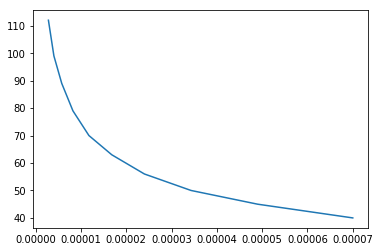

In [70]:
import matplotlib.pyplot as plt



def f(x):
    return x * exp(-x**2)

def fint(x):
    return - exp(-x**2)/2



a = -1
b = 10

eps_array = []
N_array = []

for i in range(10):
    eps = 10**(-4) * 0.7**(i+1)
    mp = midpoint_rule(f, a, b, eps)
    err = mp[0] - (fint(b) - fint(a))
    print('eps: 1e-' + str(i+1) + '; err scale:' + str(round(log(abs(err))/log(eps),2)))
    
    eps_array.append(eps)
    N_array.append(mp[1])


plt.plot(eps_array, N_array)
plt.show()

Правда похоже на $\sim eps^{-2}$. Я пытался аппроксимировать эту кривую функцией $a * (x - x_0)^{-2} + b$, но не получилось...

### Test II.2

Now use your midpoint rule to compute the value of

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

up to a predefined accuracy of $\epsilon=10^{-4}$.

Note that the integral contains an integrable singularity at the lower limit. Do calculations two ways: first, do a straightforward computation; next, subtract the singularity. Compare the number of iterations required to achieve the accuracy of $\epsilon$.

(30% of the total grade)

In [71]:
def sint(x):
    return sin(sqrt(x))/x

a = 0
b = 1
eps = 1e-4

print('int: ' + str(midpoint_rule(sint, a, b, eps)[0]) + '; iter: ' + str(midpoint_rule(sint, a, b, eps)[1]))

int: 1.850421373986771; iter: 211


In [83]:
def sintapprox(x):
    return 2 * sqrt(x)

a = 0
x0 = 1
b = 1
eps = 1e-4

exact = 1.892166140734366
res = 1000
err = 1000
for i in range(100):
    x0 *= 0.8
    newres = sintapprox(x0) - sintapprox(a) + midpoint_rule(sint, x0, b, eps)[0]
    newerr = newres - exact
    if abs(newerr) < abs(err):
        res = newres
        err = newerr
        x0res = x0
print('int: ' + str(res) + '; x_0: ' + str(x0res) + '; abs err: ' + str(err))

int: 1.8921479151991862; x_0: 0.054975581388800036; abs err: -1.82255351797167e-05


В данной части кода я разложил интегранд при малых $x$, затем ввёл "обрезку" -- ту длину, вплоть до которой такое разложение работает. Интегрируюя разложенный интегранд, мы как раз и получаем $2 \sqrt{x}$:

$\displaystyle \int_0^1 \dfrac{\sin{\sqrt{x}}}{x} dx = \int_0^{x_0} \dfrac{1}{\sqrt{x}} dx + \int_{x_0}^{1} \dfrac{\sin{\sqrt{x}}}{x} dx = 2 \sqrt{x}\ \bigg|_{\ 0}^{\ x_0} + \int_{x_0}^{1} \dfrac{\sin{\sqrt{x}}}{x} dx$

Но можно реализовать регуляризацию и другим образом -- через интегрирование по частям:

$\displaystyle \int_{0}^{1} \dfrac{\sin \sqrt{x}}{x} d x= \int_{0}^{1} \left( \dfrac{\sin \sqrt{x}}{x} - \dfrac{1}{\sqrt{x}} \right) dx + \int_{0}^{1}  \dfrac{1}{\sqrt{x}} dx$

In [74]:
def regulirized(x):
    return sint(x)-np.sqrt(1/x)

exact = 1.892166140734366

int = midpoint_rule(regulirized, 0, 1, 1e-4)[0]+2
err = abs(int - exact)

print('int: ' + str(int) + '; abs err: ' + str(err))

int: 1.8919128768112488; abs err: 0.00025326392311719736


Тоже хороший метод)